### Name : Ijaz Ullah 

### Assigment Day 2 : KKN Pipelines Date 12/12/2022
https://github.com/ijazkhan101/Machine-Learning-with-Python

In [6]:
import matplotlib.pylab as plt 
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [12]:
X,y = load_boston(return_X_y=True)

### KNN

In [17]:
pipe =Pipeline([("scaler:",StandardScaler()),("Algo",KNeighborsRegressor())])

In [18]:
pipe

Pipeline(steps=[('scaler:', StandardScaler()), ('Algo', KNeighborsRegressor())])

In [14]:
pipe.fit(X,y)

Pipeline(steps=[('scaler:', StandardScaler()), ('Algo', KNeighborsRegressor())])

In [15]:
predicted_y=pipe.predict(X)

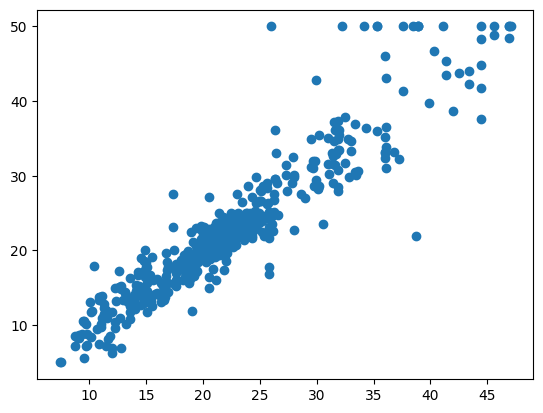

In [16]:
plt.scatter(predicted_y,y)

### 2nd Assigment RandomizedSearchCV  

In [7]:
import matplotlib.pylab as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform
import warnings 
warnings.filterwarnings('ignore')

In [8]:
X,y = load_boston(return_X_y=True)

In [4]:
pipe =Pipeline([
    ('scaler',StandardScaler()),
    ("algo",KNeighborsRegressor())]
)

In [9]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('algo', KNeighborsRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'algo': KNeighborsRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'algo__algorithm': 'auto',
 'algo__leaf_size': 30,
 'algo__metric': 'minkowski',
 'algo__metric_params': None,
 'algo__n_jobs': None,
 'algo__n_neighbors': 5,
 'algo__p': 2,
 'algo__weights': 'uniform'}

In [10]:
# using RandomizedSearchCV
model =RandomizedSearchCV(
    estimator=pipe,
    param_distributions ={'algo__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
    cv=5
)

In [11]:
model

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('algo', KNeighborsRegressor())]),
                   param_distributions={'algo__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [12]:
model.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('algo', KNeighborsRegressor())]),
                   param_distributions={'algo__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [13]:
model.predict(X)

array([25.96666667, 23.02222222, 32.57777778, 28.26666667, 30.42222222,
       26.51111111, 21.63333333, 19.31111111, 18.63333333, 20.16666667,
       19.31111111, 20.6       , 20.85555556, 19.2       , 18.26666667,
       19.74444444, 21.86666667, 17.08888889, 20.24444444, 18.76666667,
       14.96666667, 17.21111111, 15.47777778, 15.37777778, 15.57777778,
       15.26666667, 16.08888889, 14.96666667, 17.4       , 20.33333333,
       14.44444444, 16.52222222, 13.83333333, 14.97777778, 13.83333333,
       20.01111111, 20.95555556, 21.41111111, 22.65555556, 30.47777778,
       32.75555556, 24.64444444, 24.27777778, 24.27777778, 21.71111111,
       21.81111111, 21.44444444, 20.24444444, 16.44444444, 19.96666667,
       20.11111111, 21.64444444, 24.71111111, 22.26666667, 20.05555556,
       31.47777778, 26.34444444, 31.66666667, 23.66666667, 22.35555556,
       19.44444444, 18.68888889, 22.4       , 23.6       , 27.14444444,
       25.34444444, 22.2       , 22.46666667, 19.8       , 21.17

In [14]:
import pandas as pd 
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004998,0.002531,0.004200,0.001166,1,{'algo__n_neighbors': 1},0.339313,0.423779,0.534566,0.486373,-1.623928,0.032020,0.830549,10
1,0.007800,0.004400,0.011601,0.010052,2,{'algo__n_neighbors': 2},0.441649,0.547962,0.474980,0.496794,-0.548699,0.282537,0.417052,9
2,0.007598,0.005315,0.011001,0.010899,3,{'algo__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,8
3,0.004597,0.001622,0.010401,0.008593,4,{'algo__n_neighbors': 4},0.547088,0.606925,0.509770,0.490452,0.211278,0.473103,0.136807,7
4,0.023999,0.022564,0.007799,0.002786,5,{'algo__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,6
5,0.009199,0.003430,0.008600,0.007735,6,{'algo__n_neighbors': 6},0.582450,0.621194,0.509111,0.446859,0.250417,0.482006,0.130434,5
6,0.007000,0.004427,0.012601,0.009457,7,{'algo__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,4
7,0.007597,0.002155,0.016400,0.005678,8,{'algo__n_neighbors': 8},0.615090,0.631185,0.551340,0.440117,0.239072,0.495361,0.144674,3
8,0.006799,0.002317,0.007404,0.002503,9,{'algo__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1
9,0.004399,0.001198,0.004599,0.001498,10,{'algo__n_neighbors': 10},0.614446,0.652489,0.555555,0.420648,0.261128,0.500853,0.143381,2
